# <center>  Deep Neural Networks with keras </center>
<center> Neba Nfonsang </center>
<center> neba.nfonsang@du.edu </center>
<center> University of Denver </center>

In [151]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.preprocessing import image

import keras_tuner as kt
import autokeras as ak

import pandas_datareader.data as web
import datetime as dt

from jupyterthemes import jtplot
jtplot.style(theme='onedork', ticks=True, grid=True, figsize=(10, 4.5))

# Contents
- 1. Concepts of Deep Neural Networks
- 2. Artificial Neural Networks (Deep Neural Networks)
        - Application: Prediction of House Prices 
        - Application: Prediction of Customer Churn
        - Application: Grayscale Image Classification
- 3. Automatic Machine Learning (Auto ML)
- 4. Convolutional Neural Networks
        - Application: Color Image Classification
- 5. Pre-trained Deep Neural Networks
        - Application: Using Pre-trained ResNet50 for Computer Vision
- 6. Transfer Learning 
        - Application: Fine-tuning VGG16 for Computer Vision 
- 7. Recurrent Neural Networks and Long Short Term Memory Models
        - Application: Prediction of Amazon Stock Prices

## Introduction to Deep Neural Networks 
A deep neural nework (DNN) or an artificial neural network (ANN) is a special type of machine learning model consisting of successive layers of data representations.That is, a deep neural network is a stack of several layers of data representation, generally consisting of the input layer, hidden layer(s) and output layer. The first layer is called the input layer, and the last layer is called the output layer. In deep neural networks, the layer between the first and the last layers is called the hidden layer. There could be several hidden layers, making the neural networks to be "deep". The layers that receive input from the previous layers are said to be densely connected, and are hence called dense layers. Successive layers of neural network are more meaningful abstract or latent representation of the features.

<div style="max-width:700px;max-height:500px; auto; margin-left">
    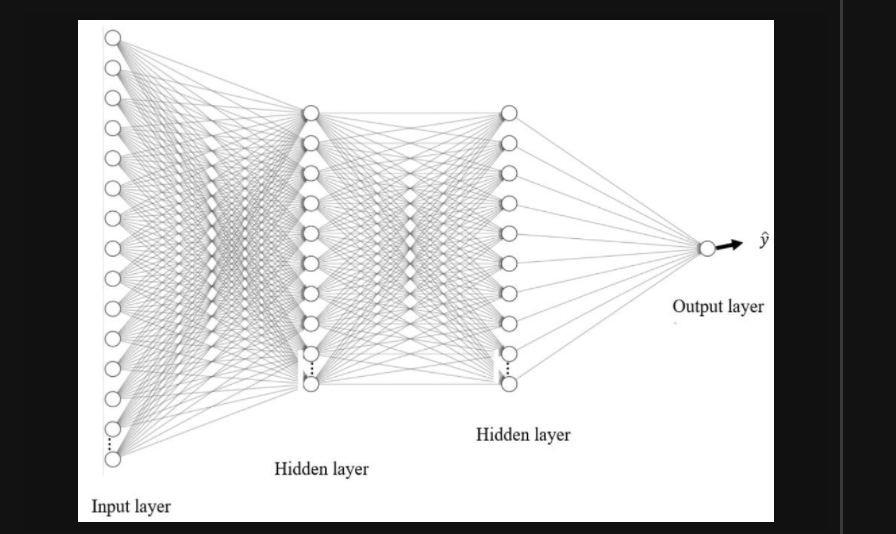
  </div>


### A perceptron
Generally, a perception is a computational unit that transforms inputs into an output (a linear combination of inputs), which could be further tranformed through an activation (non-linear) function into another output.  

<div style="max-width:400px;max-height:400px; auto; margin-center">
    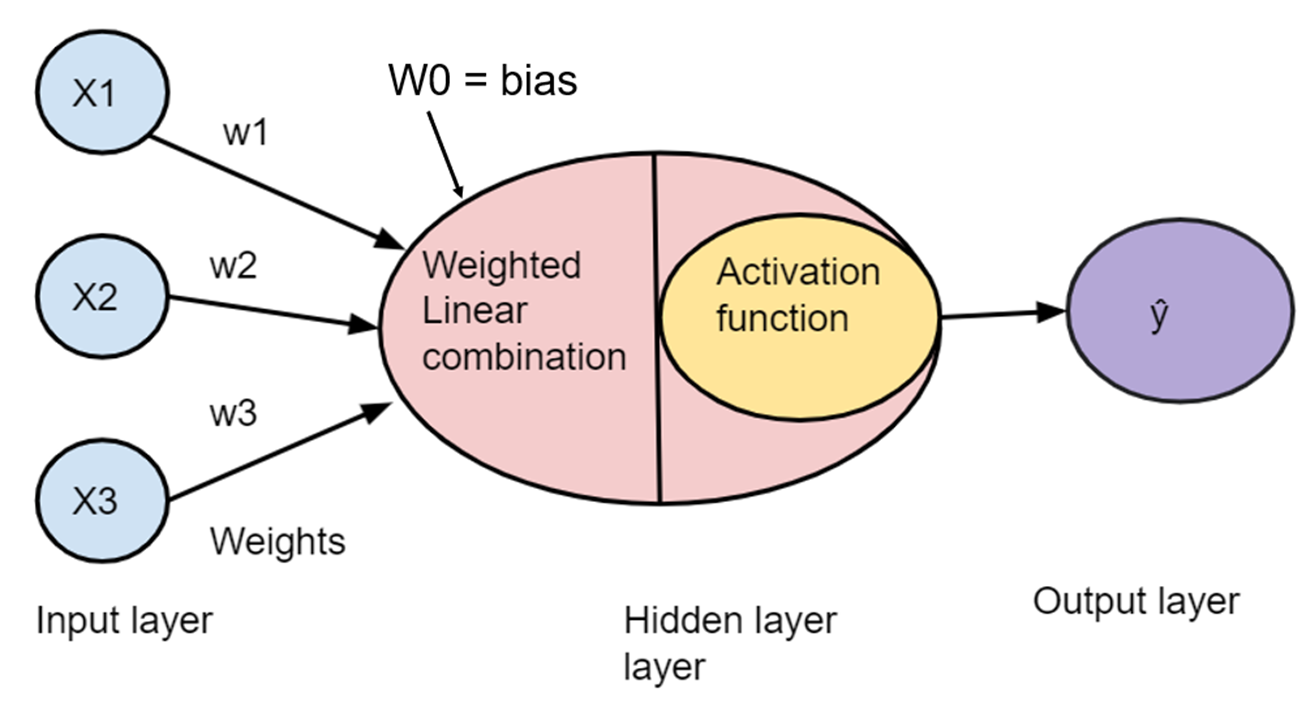
  </div>

### How are the parameters of a neural network learned?
The parameters of the deep neural network are learned through forward and backward propagation. 
<div style="max-width:400px;max-height:400px; auto; margin-center">
    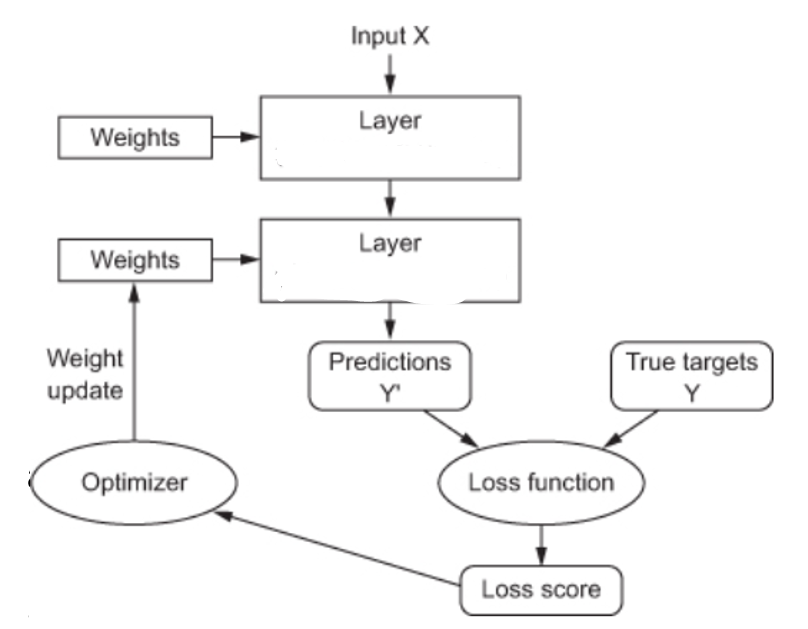
  </div>


### Forward propagation
The output in the output layer is computed through forward propagation. Generally, initial weights are specified. Inputs from the input layer are passed into the hidden layer, and processed through the nodes. In the nodes, the inputs are weighted and added together with some bias added as well. The result is then passed into an activation function to get an output value:

`output = activation(dot(input, kernel) + bias)` OR

`output = activation(sum(xi*wi) + w0))`; 

where sum(xi*wi) = weighted linear combination of inputs and w0 = bias.  

The output value is then used as input in the next layer for further processing in the nodes. This process continues until the final output is obtained. 

Backward propagation is then used to update the parameter values through a gradient descent optimizer. Foward and backward propagation continues until the model converges.  


### Backward propagation 
Backpropagation is basically the process of updating the weights of the neural networks model until the model converges. Backpropagation is implemented through the gradient descent rule: There are different flavors of gradient descent including stochastic gradient descent, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, etc. Here is a typical gradient descent rule for updating the weights:

<div style="max-width:400px;max-height:400px; auto; margin-center">
    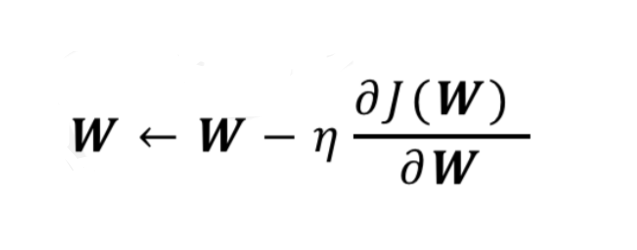
  </div>
  
  To update each weight, we need to compute the gradient or the derivative of the loss function with respect to that weight and plug the results into the gradient descent rule (optimizer). 
  
 A computational graph can help us to easily compute the derivates of the loss function with respect to each weight. 
 - We need to trace the paths that connect each weight and the final output. 
 - Compute the derivative of the loss function with respect to a weight for each path.
 - For each path, the derivative of the loss function with respect to the weight is computed by multiplying the derivatives of the output (function) at each node with respect to the output in the previous node. 
 - The final derivative of the loss with respect to the weight is then obtained by adding the derivatives of the loss function with respect to the weight for different paths. 
 
Here is how the derivative of the loss function with respect to a weight for a single path is computed:
 
<div style="max-width:600px;max-height:400px; auto; margin-center">
    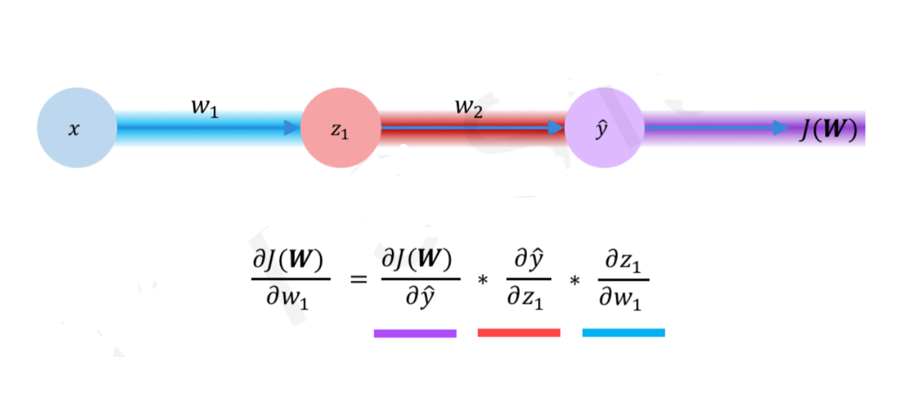
  </div>
  
- z1 is the weighted linear combination of inputs plus bias
- y-hat is the predicted output 
- w1 and w2 are weights
- J(W) is the loss function


### Types of activation functions 
- Activation function are squashing functions that map real values to values within a smaller range. The purpose of activation functions is to introduce non-linearity in the neural network.
- Non-linear activation functions allow us to learn more complex non-linear decision boundaries for classification problems. 

There are different types of activation functions including:

- **Sigmoid function:** The sigmoid (logistic) function outputs values between 0 and 1. This is a good choice for the output layer for a binary classification problem since this values can be interpreted as the probability of belonging to the desired class or class 1.

- **Tahn function:** The output of tanh is always between -1 and 1. This makes tanh a better choice for hidden layers since it keeps the average of the outputs in each layer close to zero.

- **Relu function:** g(z) = max(0, z). Relu is also a good choice for the hidden layers. It is preferred compared to tahn because it makes the learning process faster since it’s derivative is easier to compute. Its derivative is 1 when z is greater than 0 and the derivative is 0 when z is 0 or less than 0. 

- **Softmax:** Softmax is a generalization of the logistic function to a multiclass classification problem. That is, it used for multiclass logistic regression. It is therefore specified as the activation function in a neural network for classification problems with more than two classes. The softmax function takes a vector z of k values and transforms them to a vector of k probabilities. The softmax activation function is usually used in the output layer of a neural network for a multiclass classification problem. 


# Building Artificial Neural Networks in keras
keras is an interface for solving machine learning problems using deep learning. It is a high level API of tensorflow written in Python. Tensorflow is an end-to-end open source machine learning platform. 

Neural networks are constructed in keras as follows:

- 1. Neural networks in keras are initialized with the **Sequential()** class inside the tensorflow.keras module. 
- 2. The .add() method is used to add layers such as the Dense() layer. The shape of the input data is specified inside the first layer of the model using the `input_shape=(n_features, )` parameter. This parameter allow us to specify the the shape of an input instance. 
- 3. Various dense layers are then built by adding the **Dense()** class in keras.layers module. An activation function could be passed into the **Dense()** layers using the parameter, `activation`. The first paramter of the **Dense()** is `units` used to specify the number of nodes in that layer. 

- 4. Different types of activation functions may be specified in the last or output layers of neural networks depending on learning task such regression, binary classification, and multiclass classification task.  
    - For regression task (prediction of continuous outcome), there may be no need to use an activation function for the last layer. 
    - For binary classification problems, it may be good to use the sigmoid function in the last dense layer. 
    - For multi-class classification, it may be good to specify the softmax function in the last dense layer.

- 5. After the last dense layer is specified, the model is then compiled using the `.compile()` method of the model object. The `.compile()` method has parameters such `optimizer=`, and `loss=`. 

- 6. The compiled model is then fitted using the `.fit()` method of the model object. The .fit() method has parameters such as batch_size and epochs. Bactch size is the number of instances that would be used in each iteration in a single epoch. Then, epoch is the number of times that the algorithm passes through the entire dataset. Steps per epoch is the number of iterations in a single epoch. Batch size multiplied by steps per epoch equals total number of instance in the dataset. 

## Linear Regression with a Perceptron
A perceptron with no hidden layer and no activation function in the output layer is simple a linear regression model. 
Let's simulate some data and use it to build a model using a perceptron (the basic unit of a neural network) and see how well the perceptron captures the parameters of the model. 

In [215]:
# let's simulate some data 
np.random.seed(12)
x = np.arange(1, 10000+1)
noise = np.random.normal(loc=0, scale=10, size=10000)
y = 2*x + 5 + noise

In [214]:
# build the model
tf.random.set_seed(12)
model = keras.Sequential()
model.add(layers.Dense(1, input_shape=(1,)))
model.compile(optimizer="rmsprop", loss="mse")
model.fit(x, y, batch_size=20, epochs=100, verbose=0)
# generate the parameters learned by the algorithm
model.get_weights()

[array([[1.9999896]], dtype=float32), array([4.6302533], dtype=float32)]

The parameters learned by the neural network are close to the parameters used to generate the data. Note that hyper parameter values such as batch size and number of epoch impact the weights that are obtained. This is why hyper parameter tuning is very important to get an optimal model that captures the relationship in the data. 

## Deep Neural Networks for Predicting House Prices. 

In [2]:
# load the house price data
path = r"https://raw.githubusercontent.com/nfonsang/ML_App/master/house_price_data.csv"
data = pd.read_csv(path)
data = data.set_index("No")
data.head()

house_age  distance_to_nearest_MRT_station  convenience_stores  \
No                                                                   
1          32                            84.88                  10   
2          20                           306.59                   9   
3          13                           561.98                   5   
4          13                           561.98                   5   
5           5                           390.57                   5   

    house_price_of_unit_area  
No                            
1                   14037.04  
2                   15629.63  
3                   17518.52  
4                   20296.30  
5                   15962.96

In [3]:
# extract the features 
X = data[['house_age', 'distance_to_nearest_MRT_station', 
          'convenience_stores']]
X.head()

house_age  distance_to_nearest_MRT_station  convenience_stores
No                                                                
1          32                            84.88                  10
2          20                           306.59                   9
3          13                           561.98                   5
4          13                           561.98                   5
5           5                           390.57                   5

In [4]:
# extract the output data
y = data["house_price_of_unit_area"]
y.head()

No
1    14037.04
2    15629.63
3    17518.52
4    20296.30
5    15962.96
Name: house_price_of_unit_area, dtype: float64

In [5]:
# split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)


In [6]:
# scale the features 
X_sc = MinMaxScaler()
X_sc = X_sc.fit(X_train).transform(X_train)

In [7]:
X_sc_test = MinMaxScaler()
X_sc_test = X_sc_test.fit(X_test).transform(X_test)

### Model building (DNN) 

In [85]:
# build the deep neural network model

# input shape
input_shape = len(X.columns)
# initializing the model
model = keras.Sequential()
# input_shape can be optionally specified 
## to make sure data with the right shape is used
# in this example, let's specify 10 nodes for the first hidden layer
model.add(layers.Dense(10, input_shape=(input_shape,)))
# let's specify 4 nodes for the second hidden layer 
model.add(layers.Dense(4))
# let's specify 1 node for the output layer
model.add(layers.Dense(1))
# compile the model: specify the optimizer and loss function 
model.compile(optimizer='rmsprop', loss='mse')
# build the model with the training set
model.fit(X_sc, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 0s 1ms/step - loss: 231386512.0000
Epoch 2/5
9/9 [==============================] - 0s 2ms/step - loss: 231379664.0000
Epoch 3/5
9/9 [==============================] - 0s 2ms/step - loss: 231373936.0000
Epoch 4/5
9/9 [==============================] - 0s 2ms/step - loss: 231368320.0000
Epoch 5/5
9/9 [==============================] - 0s 2ms/step - loss: 231362496.0000


### Model Summary

In [86]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


### Cross-validation 
Cross-valiation can be done by specifying a `validation_split` parameter inside the .fit() method of the model. 

In [87]:
history = model.fit(X, y, epochs=100, verbose=0, validation_split=0.3)

### Training history
- The training history can be inspected to understand the number of epochs that will be optimal for an early stop. 

In [88]:
# check the artifacts stored in the training history
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [218]:
# history.history["val_loss"]

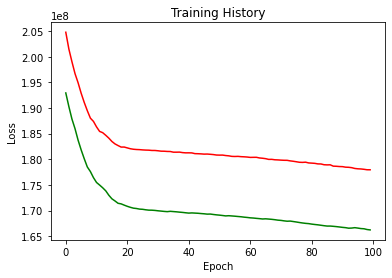

In [90]:
# visualize training history
plt.title("Training History")
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.plot(history.history["val_loss"], color="green")
plt.plot(history.history["loss"], color="red");

The plot indicates that an optimal number epochs could be around 20, so we can retrain the model with 20 epochs. 

### Model evaluation 


In [98]:
# compute mse 
model.fit(X_train, y_train, epochs=20, verbose=0)
print("Test loss", "Test acc")
test_loss = model.evaluate(X_sc_test, y_test)

Test loss Test acc
5/5 [==============================] - 0s 4ms/step - loss: 202716320.0000


In [92]:
# compute rmse
rmse = np.sqrt(test_loss)
rmse

14336.698643690605

### Make predictions 

In [93]:
# display on the first 10 predictions
model.predict(X_sc_test)[0:10]

array([[30.216358],
       [33.39503 ],
       [22.165653],
       [27.01649 ],
       [34.00618 ],
       [45.548767],
       [34.40311 ],
       [34.40311 ],
       [33.26356 ],
       [37.054455]], dtype=float32)

In [41]:
y_test

No
359    16703.70
351    15666.67
374    19333.33
400    13814.81
370     8444.44
         ...   
146    16851.85
266    14111.11
110    10518.52
203    11666.67
197    13555.56
Name: house_price_of_unit_area, Length: 137, dtype: float64

## Deep Neural Network for Predicting Customer Churn

In [99]:
# load the data
url = r"https://raw.githubusercontent.com/nfonsang" + \
      "/datasets/master/churn_data.csv"
churn_data = pd.read_csv(url)
churn_data.head()

avg_interactions_with_support  owner_blocks_per_month  avg_income_last_12  \
0                       0.617163                9.577551         3814.028288   
1                       0.806455                8.798974         4206.420776   
2                       0.782139                7.734795         4552.123937   
3                       0.718405                8.326465         2678.914523   
4                       0.449931                9.654206         3152.906971   

   avg_income_last_6  avg_review_score  number_of_reviews  bookings_per_month  \
0        5426.263674          2.057209          15.310482            6.807388   
1        4655.139391          2.688184          12.099859           11.036336   
2        3851.009952          2.607130          12.348177            9.001582   
3        3593.631638          2.394683          13.332082            6.156692   
4        4352.544162          1.499769          17.709455            5.898279   

   weekends_booked_per_month  avg_nightly_rate  avg_length_of_stay  churn  
0                   2.000974        112.447254            2.251096      0  
1                   1.745107        162.364418            1.963245      0  
2                   1.961279        362.219228            2.206438      0  
3                   2.155884        284.710399            2.425369      0  
4                   2.715650        219.075644            3.055107      0

### Preprocessing

In [100]:
# inspect the variables
churn_data.columns 


Index(['avg_interactions_with_support', 'owner_blocks_per_month',
       'avg_income_last_12', 'avg_income_last_6', 'avg_review_score',
       'number_of_reviews', 'bookings_per_month', 'weekends_booked_per_month',
       'avg_nightly_rate', 'avg_length_of_stay', 'churn'],
      dtype='object')

In [101]:
# data types 
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18372 entries, 0 to 18371
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   avg_interactions_with_support  18372 non-null  float64
 1   owner_blocks_per_month         18372 non-null  float64
 2   avg_income_last_12             18372 non-null  float64
 3   avg_income_last_6              18372 non-null  float64
 4   avg_review_score               18372 non-null  float64
 5   number_of_reviews              18372 non-null  float64
 6   bookings_per_month             18372 non-null  float64
 7   weekends_booked_per_month      18372 non-null  float64
 8   avg_nightly_rate               18372 non-null  float64
 9   avg_length_of_stay             18372 non-null  float64
 10  churn                          18372 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.5 MB


In [102]:
# distribution of input variable 
churn_counts = churn_data["churn"].value_counts()
churn_counts

0    10000
1     8372
Name: churn, dtype: int64

(<AxesSubplot:>,)

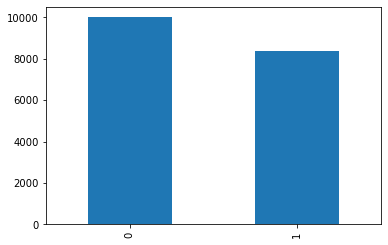

In [103]:
churn_counts.plot(kind="bar"),

In [504]:
# split the data
X_churn_data = churn_data.iloc[:, 0:-1]
y_churn_data = churn_data["churn"]
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(
                                                    X_churn_data, 
                                                    y_churn_data, 
                                                    test_size=0.33, 
                                                    random_state=1)

print(X_train_ch.shape, y_train_ch.shape)
print(X_test_ch.shape, y_test_ch.shape)

(12309, 10) (12309,)
(6063, 10) (6063,)


In [542]:
# number of features
input_dim= len(X_churn_data.columns)
# initializing the model
model = keras.Sequential()
# add layers 
model.add(layers.Dense(10, input_dim=input_dimm, activation="relu"))
#model.add(layers.Dense(6, activation="relu"))
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
# compile the model: specify the optimizer and loss function 
model.compile(optimizer='rmsprop', 
              loss="binary_crossentropy",
              metrics=["accuracy"])
# build the model with the training set
model.fit(X_train_ch, y_train_ch, epochs=5)

Epoch 1/5
385/385 [==============================] - 1s 1ms/step - loss: 233.0980 - accuracy: 0.4987
Epoch 2/5
385/385 [==============================] - 1s 2ms/step - loss: 7.8055 - accuracy: 0.5105
Epoch 3/5
385/385 [==============================] - 1s 1ms/step - loss: 7.2490 - accuracy: 0.5056
Epoch 4/5
385/385 [==============================] - 0s 1ms/step - loss: 6.7644 - accuracy: 0.5118
Epoch 5/5
385/385 [==============================] - 0s 1ms/step - loss: 6.8349 - accuracy: 0.5039


In [543]:
# compute test accuracy
model.fit(X_train_ch, y_train_ch, epochs=5, verbose=0)
test_loss, test_acc = (model.evaluate(X_test_ch, y_test_ch, verbose=0))
test_acc

0.45736435055732727

In [544]:
# compute training accuracy
train_loss, train_acc = model.evaluate(X_train_ch, y_train_ch, 
                                       verbose=0)
train_acc

0.45503291487693787

### Hyper parameter tunning in deep neural networks


Hyperparameters in deep neural networks includes:
- Number of layers, 
- Number of nodes per layer, 
- Number of epochs or iterations, 
- Batch size,
- Loss function, 
- Activation functions, 
- Optimizer,
- Learning rate, etc

To tune the hyper parameters of the model, we need to first build a function that returns the model. 

In [564]:
def model_builder(hp):
    model = keras.Sequential()
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=30, max_value=500, step=20)
    model.add(layers.Dense(units=hp_units, input_dim=n_features_ch, 
                           activation="relu"))
    
    model.add(layers.Dense(4, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    
    # tune the learning rate 
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    return model
    

Make sure to install and import keras tuner 
- pip install -q -U keras-tuner
- import keras_tuner as kt


In [565]:
# initialize the tunner
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=20,
                     directory="my_dir",
                     project_name='churn_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir\churn_kt\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir\churn_kt\tuner0.json


In [566]:
# create a callback to stop training early if validation loss reaches a certain value
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


In [567]:
# run a hyper parameter search
tuner.search(X_train_ch, y_train_ch, epochs=20, validation_split=0.2, callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [568]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Optimal number of units for first layer: ", best_hps.get('units'))
print(("Optimal learning rate: ", best_hps.get('learning_rate')))

Optimal number of units for first layer:  64
('Optimal learning rate: ', 0.001)


In [569]:
# find best epoch

## Build the model with the optimal hyper parameters and train it on the data with 20 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_ch, y_train_ch, epochs=20, validation_split=0.3, verbose=0)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 1


In [570]:
# retrain model with best epoch and hyper parameters 
optimal_model = tuner.hypermodel.build(best_hps)
optimal_model.fit(X_train_ch, y_train_ch, epochs=best_epoch, validation_split=0.3, verbose=0)
optimal_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 969
Trainable params: 969
Non-trainable params: 0
_________________________________________________________________


In [575]:
# test accuracy
optimal_model.evaluate(X_test_ch, y_test_ch)[1]

190/190 [==============================] - 0s 958us/step - loss: 0.6909 - accuracy: 0.5428


0.5428006052970886

In [576]:
# training accuracy
optimal_model.evaluate(X_train_ch, y_train_ch)[1]

385/385 [==============================] - 0s 911us/step - loss: 0.6908 - accuracy: 0.5450


0.5450483560562134

After hyper parameter tuning, the test and training accuracies of the deep neural network increased from 45 to 54. In a practical situation, you may need to collect more data or try different variables to improve on the accuracy of the model. 

### Predicting customer churn with random forest
- Let's compare a random forest model with the neural network we built. It is usually a good idea to experiment with different types of models for a specific dataset, then adopt the model with the best performance. 

In [580]:
rf = RandomForestClassifier(max_depth=7)
rf.fit(X_train_ch, y_train_ch)

print("Random Forest Test Acc: ", rf.score(X_test_ch, y_test_ch))

print("Random Forest Train Acc: ", rf.score(X_train_ch, y_train_ch)) 

Random Forest Test Acc:  0.6425861784595085
Random Forest Train Acc:  0.6681290112925502


Random forest seems to be performing better than the deep neural network for this dataset. Note that deep neural networks are great for image data but deep neural networks can be used for non-image data too. 

## Deep Neural Network for Image Classification
Deep neural network can be used for image classification or object identification (computer vision). 

<div style="max-width:400px;max-height:350px; auto; margin-center">
    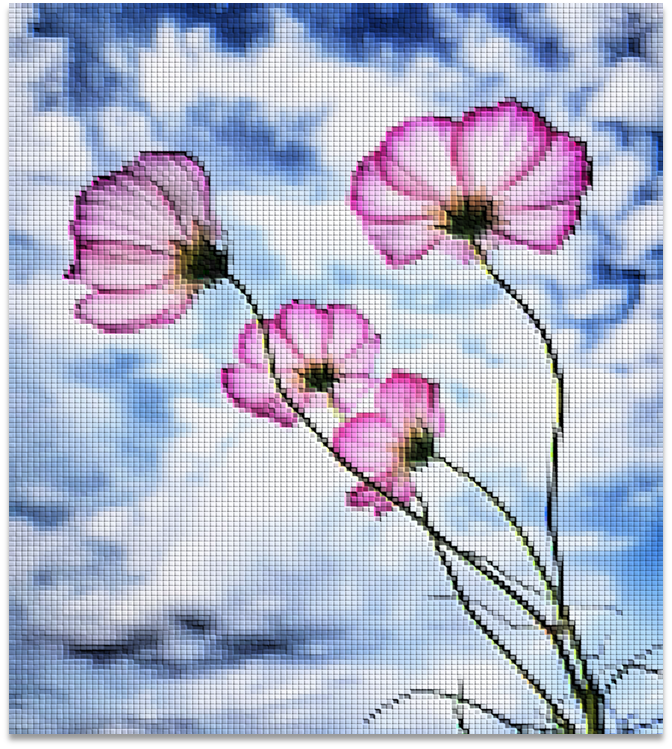
  </div>

### Data representation for an Image
- A digital image consists of a grid of rows and columns. 
- A single cell in the image grid is called a pixel, which is the basic element of a the picture. 
- Therefore, an image consists of a rectangular grid of pixels where each pixel itself is a small rectangle. 
- Each pixel in an image is assumed to have a color, hence each pixel is given a value to represent the color of the pixel. 
- For grayscale images, the pixel value is a single number that represents the brightness of the pixel. That is, the red, green, and blue components are assumed to be same for all pixels in that image).
- For a colored image, each pixel has three color components; red, green and blue (RGB). 
- Each of the RGB components of a colored picture or image are stored as separate grayscale images known as color planes. 


<div style="max-width:400px;max-height:350px; auto; margin-center">
    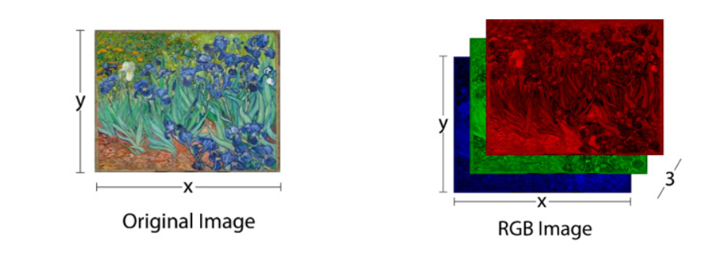
  </div>


- Pixel values range from 0 to 255
- To use algorithms to learn from images, the images need to be represented as numbers (matrices or tensors).

### Matrix and tensor representation of images: Grayscale images


- Grayscale images are represented as 3D tensors (equivalent to 3D NumPy arrays). 
- A grayscale image with 3D tensor has three dimensions: 
- The first dimension of a grayscale image  consists of the samples or images
- The second and the third dimensions are the grid of pixel values (height and width of the image)
- The shape of a grayscale image is (sample, height, width)

Let's randomly generate 4 grayscale images with height=5 and width=5. 

In [610]:
np.random.seed(1234)
images = np.random.randint(low=0, high=255, size=100).reshape(4, 5, 5)
images

array([[[ 47, 211,  38,  53, 204],
        [116, 152, 249, 143, 177],
        [ 23, 233, 154,  30, 171],
        [158, 236, 124,  26, 118],
        [186, 120, 112, 220,  69]],

       [[ 80, 201, 127, 246, 254],
        [175,  50, 240, 251,  76],
        [ 37,  34, 166, 250, 195],
        [231, 139, 128, 233,  75],
        [ 80,   3,   2,  19, 140]],

       [[193, 203, 115, 107, 250],
        [209,  14, 243, 199,  60],
        [234, 107, 174, 156,  81],
        [ 87,  13, 116,  96, 140],
        [197, 253, 113, 223, 229]],

       [[159, 249, 252,  89,  84],
        [ 45,  16,  41,  72, 184],
        [236,  70, 184,  86, 172],
        [218, 211,  47, 177,  18],
        [ 85, 174, 226,  37, 109]]])

In [616]:
# shape and dimension of image
print("Image shape: ", images.shape)
print("Image dimension: ", images.ndim)

Image shape:  (4, 5, 5)
Image dimension:  3


[[ 47 211  38  53 204]
 [116 152 249 143 177]
 [ 23 233 154  30 171]
 [158 236 124  26 118]
 [186 120 112 220  69]]


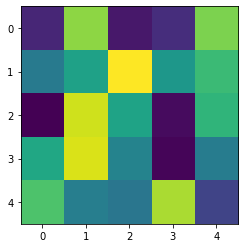

In [618]:
# visualize the image
print(images[0])
plt.imshow(images[0]);

The 3D image dataset with shape(samples, height, width) can be unpacked into a 2D image dataset by unpacking the matrix that makes up each image into a vector of values. 

- Let's unpack the image dataset we created to a 2D dataset by reshaping the dataset using images.reshape(samples, height*width)

In [622]:
samples, height, width = images.shape
print("Samples: ", samples)
print("Image Height: ", height)
print("Image Width: ",width)

Samples:  4
Image Height:  5
Image Width:  5


In [624]:
unpacked_images = images.reshape(samples, height*width)
unpacked_images

array([[ 47, 211,  38,  53, 204, 116, 152, 249, 143, 177,  23, 233, 154,
         30, 171, 158, 236, 124,  26, 118, 186, 120, 112, 220,  69],
       [ 80, 201, 127, 246, 254, 175,  50, 240, 251,  76,  37,  34, 166,
        250, 195, 231, 139, 128, 233,  75,  80,   3,   2,  19, 140],
       [193, 203, 115, 107, 250, 209,  14, 243, 199,  60, 234, 107, 174,
        156,  81,  87,  13, 116,  96, 140, 197, 253, 113, 223, 229],
       [159, 249, 252,  89,  84,  45,  16,  41,  72, 184, 236,  70, 184,
         86, 172, 218, 211,  47, 177,  18,  85, 174, 226,  37, 109]])

Again let's visualize the first image and the unpacked image in the dataset


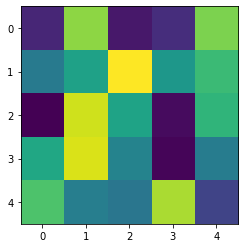

In [628]:
# 3D image
plt.imshow(images[0]);

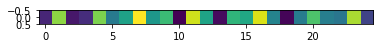

In [630]:
#2D image 
plt.imshow(unpacked_images[0].reshape(1, 25));

 ### An example of a 3D image dataset
 
The mnist is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

Data source: http://yann.lecun.com/exdb/mnist/

The mnist image dataset can be loaded using the load_data() function from the kares.datasets module as follows:

In [663]:
 (x_train_mn, y_train_mn), (x_test_mn, y_test_mn) = mnist.load_data()


11493376/11490434 [==============================] - 9s 1us/step


In [673]:
# let's examine the shapes of the training and test mnist datasets
print("Shape of mnist input training image dataset: ", x_train_mn.shape)
print("Shape of mnist input test imaage dataset: ", x_test_mn.shape)

Shape of mnist input training image dataset:  (60000, 28, 28)
Shape of mnist input test imaage dataset:  (10000, 28, 28)


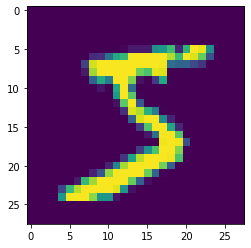

In [670]:
# let's view the first image in the training set
plt.imshow(x_train_mn[0]);

### Matrix or tensor representation of images: color images


Color scale images are represented as 4D tensors with shape(samples, height, width, color_depth).
Each image has a width and height and three channels reprensenting red, green and blue components. 
That is, each colored image consists of three grayscale color planes 


<div style="max-width:400px;max-height:350px; auto; margin-center">
    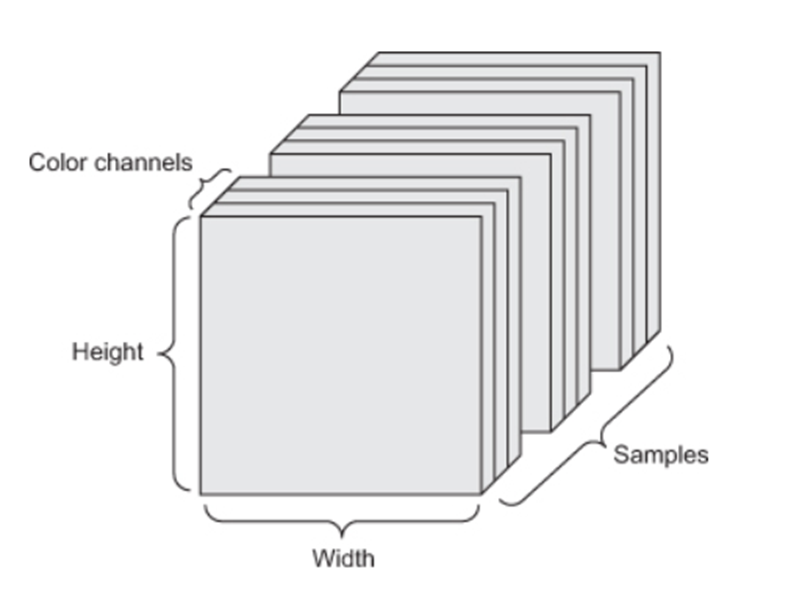
  </div>



In this figure, there are three color images. Each image has three (RGB) grayscale color planes. So, there are three channels (RGB) for this image dataset and the channels represent the color depth.  

### Example of 4D image dataset 

The cifar10 is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled with 10 categories including:

0 = airplane; 1 = automobile; 2	= bird, 3 = cat; 4 = deer; 5 = dog; 6 = frog; 7	= horse; 8	= ship; 9 = truck

Source: https://www.cs.toronto.edu/~kriz/cifar.html

The cifar10 dataset can be loaded using the .load_data method in the keras.datasets module:

You may need to import `ssl` before loading the data to avoid running into errors

`import ssl
ssl._create_default_https_context = ssl._create_unverified_context`

In [675]:
# load the cifar10 image dataset
(x_train_ci, y_train_ci), (x_test_ci, y_test_ci) = cifar10.load_data()

In [662]:
print("Shape of cifar10 input training image dataset: ", x_train_ci.shape)
print("Shape of cifar10 input test imaage dataset: ", x_test_ci.shape)

Shape of cifar10 input training image dataset:  (50000, 32, 32, 3)
Shape of cifar10 input test imaage dataset:  (10000, 32, 32, 3)


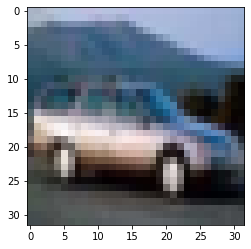

In [671]:
# let's view the 5th image
plt.imshow(x_train_ci[4]);

## How to Build a Deep Neural Networks with Grayscale Image Dataset

- We will use the mnist image dataset

In [824]:
# let's load the mnist image dataset 
(x_train_mn, y_train_mn), (x_test_mn, y_test_mn) = mnist.load_data()

### Image Data Preprocessing

- Check the distribution of the output data
- Normalize the data to a smaller range. Since the pixel values range from 0 to 255, we can divide each value in the dataset by 255 to scale the data to a range of 0 to 1.  
- Scaling the data helps your algorithm to run faster as well as produce better results. If you scale the input training set, also make sure to scale the input test set because the distributions of your training and test sets should be similar for your algorithm to generalize well. This is a major assumption in machine learning. 

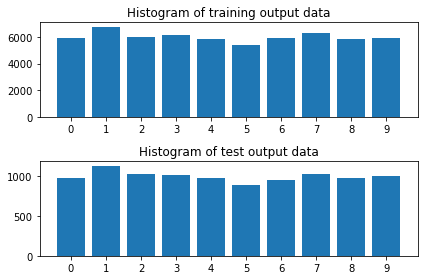

In [825]:
# distribution of (image type) for the training and test output data 

train_hist  = np.histogram(y_train_mn)[0]
test_hist  = np.histogram(y_test_mn)[0]

fig, ax = plt.subplots(2)
ax[0].set_xticks(range(10))
ax[1].set_xticks(range(10))

ax[0].bar(range(10), train_hist)
ax[0].set_title("Histogram of training output data")
ax[1].bar(range(10), test_hist)
ax[1].set_title("Histogram of test output data")
fig.tight_layout()

In [826]:
# minimum and maximum value of pixel values
print("Minimum value in the data: ", np.min(x_train_mn))
print("Minimum value in the data: ", np.max(x_test_mn))

Minimum value in the data:  0
Minimum value in the data:  255


In [827]:
# scale the training and test input data
x_train_mn = x_train_mn/255
x_test_mn= x_test_mn/255

In [828]:
# minimum and maximum value of scaled pixel values
print("Minimum value in the scaled data: ", np.min(x_train_mn))
print("Minimum value in the scaled data: ", np.max(x_test_mn))

Minimum value in the scaled data:  0.0
Minimum value in the scaled data:  1.0


In [829]:
# view input training set 
x_train_mn[0:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [830]:
# transform output data to categorical type 
y_train_mn = tf.keras.utils.to_categorical(y_train_mn)
y_test_mn = tf.keras.utils.to_categorical(y_test_mn)

In [831]:
# view the training output data
y_train_mn

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [832]:
# shape of data
print("Shape of input trainig data: ", x_train_mn.shape)
print("Shape of output test data: ", x_test_mn.shape)

Shape of input trainig data:  (60000, 28, 28)
Shape of output test data:  (10000, 28, 28)


In [833]:
# unpack the 3D data to 2D by reshaping
x_train_mn = x_train_mn.reshape(60000, 28*28)
x_test_mn = x_test_mn.reshape(10000, 28*28)

In [834]:
# shape of unpacked data
print("Shape of unpacked input trainig data: ", x_train_mn.shape)
print("Shape of unpacked output test data: ", x_test_mn.shape)

Shape of unpacked input trainig data:  (60000, 784)
Shape of unpacked output test data:  (10000, 784)


In [835]:
n_features = x_train_mn.shape[1]
n_features

784

In [836]:
y_train_mn.shape

(60000, 10)

### Model Building


In [876]:
# make results reproducible: set a reandom seed
tf.random.set_seed(42)

# initializing the model
model = keras.Sequential()
model.add(layers.Dense(512, input_shape=(n_features,), activation="relu"))
# use a softmax activation function for the output layer for a multiclass classification
# for a multiclass, number of units or nodes should be equal to number of classes
model.add(layers.Dense(10, activation="softmax"))
# compile the model: specify the optimizer and loss function
## use categorical_crossentropy loss function for multiclass classification
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=["accuracy"])
# build the model with the training set
model.fit(x_train_mn, y_train_mn, epochs=5, batch_size=128, verbose=1)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2549 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1034 - accuracy: 0.9699
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0679 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0495 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0372 - accuracy: 0.9890


In [838]:
# model summary 
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_42 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [877]:
# retrain model with best epoch and evaluate the model
model.fit(x_train_mn, y_train_mn, epochs=5, verbose=0)
train_scores = model.evaluate(x_train_mn, y_train_mn)
test_scores =  model.evaluate(x_test_mn, y_test_mn)
print("Train Acc; ", train_scores[1])
print("Test Acc; ", test_scores[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.0994 - accuracy: 0.9788
Train Acc;  0.9956499934196472
Test Acc;  0.9787999987602234


## AutoML (Automated Machine Learning)

- AutoML is the automation of the process of applying machine learning to a dataset. We can automatically tune hyper parameters and find the optimal model automatically. 
- AutoML can be done using `AutoKeras`, a machine learning package based on Keras. 

Let's train and find the optimal model using autokeras
- first install autokeras: !pip install autokeras
- then import autokeras: import autokeras as ak

See more information on autokeras: https://autokeras.com


### AutoML with the MNIST Dataset

In [885]:
# load the data 
(x_train_mn, y_train_mn), (x_test_mn, y_test_mn) = mnist.load_data()

In [893]:
# build the model
## specificy the maximum number of models to try
clf = ak.ImageClassifier(overwrite=True, max_trials=2)
clf.fit(x_train_mn, y_train_mn, epoc=1)

Trial 1 Complete [00h 02m 03s]
val_loss: 0.06338795274496078

Best val_loss So Far: 0.06338795274496078
Total elapsed time: 00h 02m 03s
INFO:tensorflow:Oracle triggered exit
1875/1875 [==============================] - 168s 89ms/step - loss: 0.1559 - accuracy: 0.9522
INFO:tensorflow:Assets written to: .\image_classifier\best_model\assets


You can specify more trials and/or use higher number for epochs, for example, max_trials=5, epochs=5. I used 1 epoch and two trials due to limited computing power. The idea here is to illustrate how AutoML works.  The best model is automatical saved and can be evaluated and used for prediction as shown below. 

In [896]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test_mn, y_test_mn))

313/313 [==============================] - 5s 14ms/step - loss: 0.0607 - accuracy: 0.9802
[0.06071830540895462, 0.9801999926567078]


The test accuracy is 98.02%

In [897]:
# Predict with the best model, for the first 10 images.
predicted_y = clf.predict(x_test_mn)
print(predicted_y[1:10])

313/313 [==============================] - 4s 14ms/step
[['2']
 ['1']
 ['0']
 ['4']
 ['1']
 ['4']
 ['9']
 ['5']
 ['9']]


## Convolutional Neural Network (CNN)

A convolutional neural network is a special type of neural network where feature extraction is performed through convolutional and pooling layers before the the transformed data is passed to the fully connected layer. That means, the convolutional neural network architechture consists of the input layer, a series of convolutional and pooling layers, a flatten layer, and fully-connected layers. 

As shown below, the first layer is the input layer. Between the input layer and the flatten layer are a series of convolutional and pooling layers that are used for feature extraction. As already illustrated, when we have a color image dataset we could unpack the dataset to a 2D dataset in a regular neural network as a preprocessing step before using the data for modeling. This can be problematic when the color image dataset is large. Unpacking a large colored image dataset to a 2D dataset can increase number of "features" or parameters tremendously, which can potentially result to overfitting. 

For example, the cifar10 training dataset of 50,000 32x32 color training images with shape (50000, 32, 32, 3) can be unpacked to a 2D dataset with shape (50000, $32*32*3$). If we were using the 2D dataset for a single perceptron, then there will be 3072 weights. The number of weights will increase if there are hidden layers with multiple units or if the image height and width are larger.

As such, it would be nice to extract relevant features before passing the data to the fully-connected layers for processing. Convolutional neural networks therefore provide an excellent way to automatically performing feature extraction through it's convolutional and pooling layers.

<div style="max-width:400px;max-height:400px; auto; margin-center">
    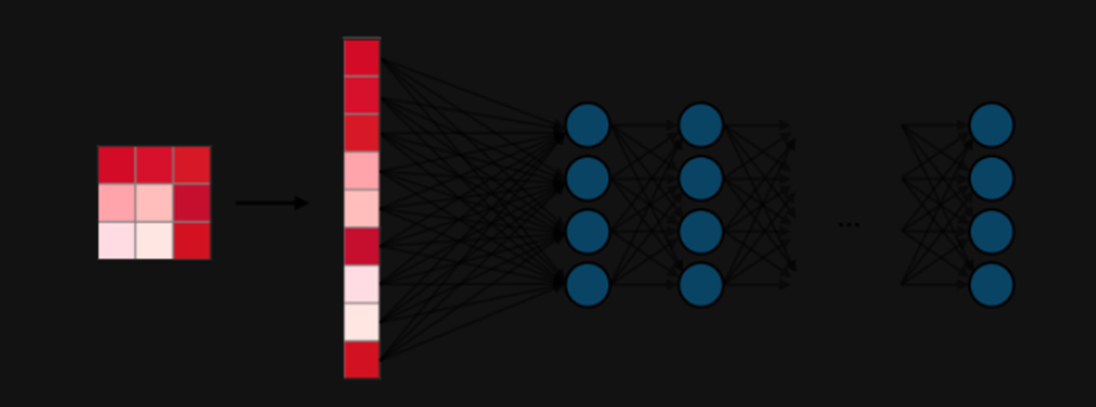
  </div>

The process of building a convolutional neural network has four major steps:
1) Convolution 

2) Pooling 

3) Flattening 

4) Full connection

<div style="max-width:850px;max-height:400px; auto; margin-center">
    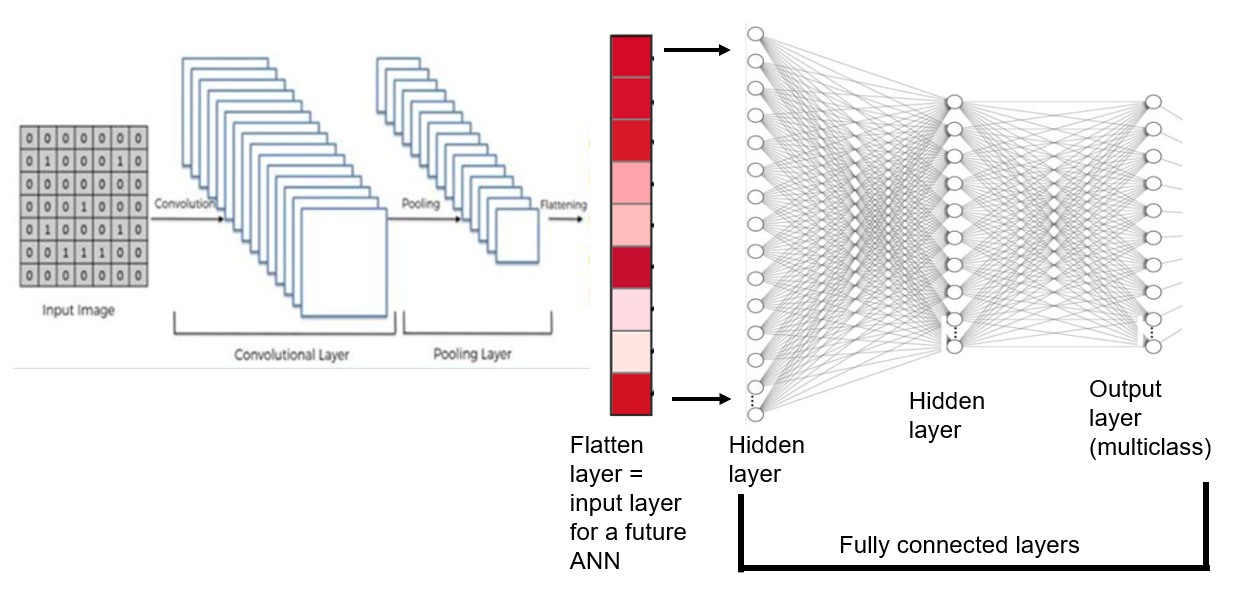
</div>


The first part of the CNN (before the ANN) is called the convolutional base while the second part (ANN only) of the CNN is called the classifier.

Let's discuss the key operations such as convolution and pooling operations involved in building a convolutional neural networks model. 

### The convolution operation 
The convolution operation is carried out in the convolution layer.  A convolution operation involves the transformation of the input layer into a feature map using a convolution filter (kernel or detector). Here is an example of a convolution operation with a 2D input data and a 3x3 filter. 

<div style="max-width:700px;max-height:400px; auto; margin-center">
    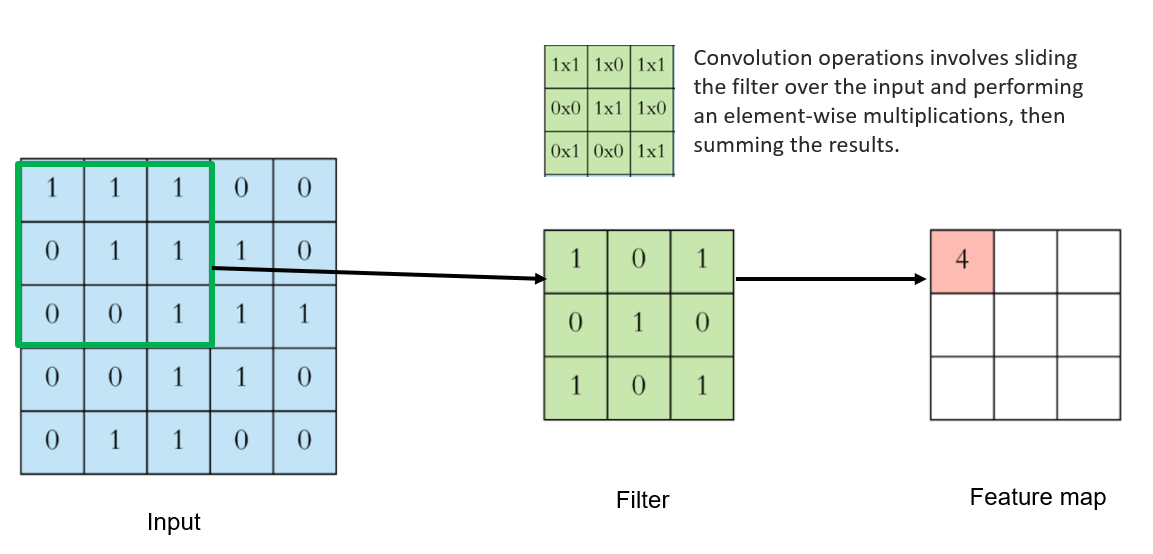
  </div>
 

Color images are usually 3D (RGB), so a 3D filter will be needed when the image is 3D. When we have a 3D image for example:
- We could slide a 5x5x3 filter across a 32x32x3 colored image. When the filter is in a particular region, it covers a small volume of the input where the convolution operation will be performed. The matrix multiplication is done in 3D and all the results are added to obtain a single value. So when we scan through the entire image, a 2D output will be obtained. 
- Different filters are used to capture or extract different aspects of the image, so if 12 filters were used, there will be 12 of the 2D outputs stacked together to give a 3D volume output as shown below:

<div style="max-width:700px;max-height:400px; auto; margin-center">
    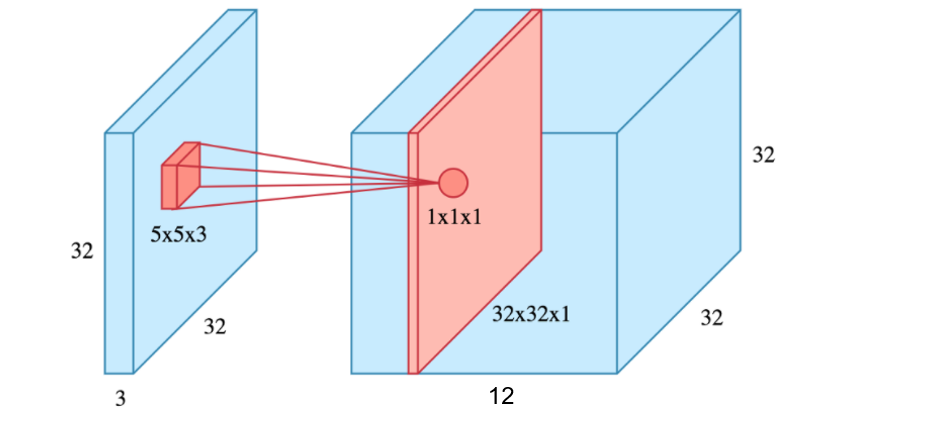
  </div>
  
 - The resulting output from 12 filters will have a volume of 32x32x12. 
 - An activation function could be used to scale the output volume, hence the values of the output will change but the volume will still be the same, 32x32x12.
 - The feature map obtained from the convolutional layer is then passed to the pooling layer for further processing. 

### The pooling operation
The pooling operation is a kind of "dimensionality reduction" or downsampling technique achieved by sliding a pooling window across a 3D input. The pooling layer helps us to ignore less important features in the image and further reduce the image, while preserving important features. For example, if we have a picture of a cat seating on a carpet, pooling helps extract the features of the cat and ignore the capet. 

There are three main types of pooling operations: max pooling, minimum pooling and average pooling, where the maximum, minimum or average of the numbers in the region of the input data traversed by the fixed-shape pooling window is obtained as the output. Pooling only reduces the height and the width of the input data but the depth remains the same. For example, a pooling window of size 4x4 could be used to transform a 32x32x3 input to a 16x16x3 output.
Here is an example of max pooling where a 2x2 window is used to transform a 4x4 image into a 2x2 output. 

<div style="max-width:600px;max-height:400px; auto; margin-center">
    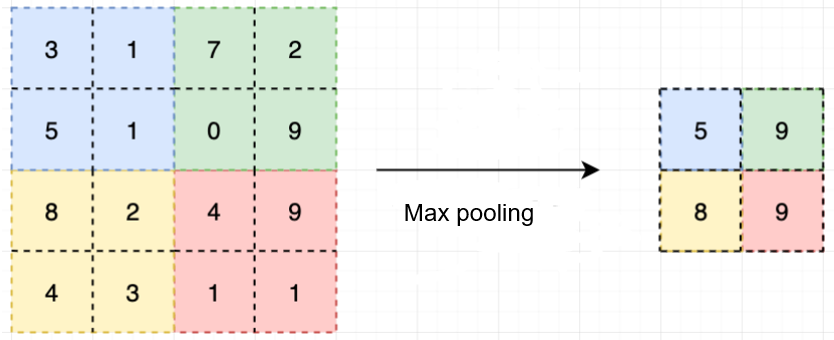
</div>
  
Successive convolution and pooling operations can be performed before the data is processed through the fully connected layers. Note that several pooling operations could be performed on each image. For each image, a flatten layer is usually used to flatten the output of the last pooling layer. 

### Flattening
For each image, flattening unpacks the pooled output volume into a vector of data which can then be processed through the fully connected layers of the artificial neural network. The output of the flatten layer is the input of the artificial neural networks. If flattening is applied on an output of volume 16x16x12 from the pooling layer, a vector of 3072 values will be obtained as shown below:
<div style="max-width:600px;max-height:400px; auto; margin-center">
    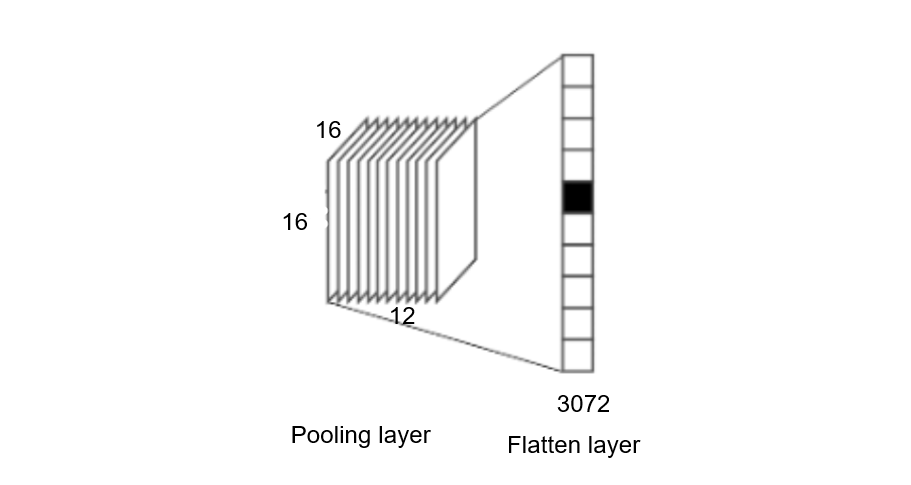
</div>

### The hyper parameters of the filter
**The dimension of the filter:** The size of the filter such as 3x3, 5x5, or 7x7 are hyper parameters that can be optimized. The depth of the filter usually corresponds to the depth of the image, so we leave that out. 

**The number of filters (depth of output volume):** The number of filters used is a very important hyper parameter that could be tuned. 

**Strides:** This is the number of pixel shifts over the input data after each convolution operation. The default is 1, meaning we shift by one pixel after each convolution operation. Note that strides could be a hyper parameter when pooling is applied. So, strides is a hyper parameter both for convolution and pooling. 

**Padding:** As we scan the input data with the filter, the filter may not fit perfectly some times. As such, we can handle this through zero-padding where zeros are included at the borders of the image or by droping the part image where the filter does not fit. There are different modes of zero-padding as shown below:

<div style="max-width:700px;max-height:400px; auto; margin-center">
    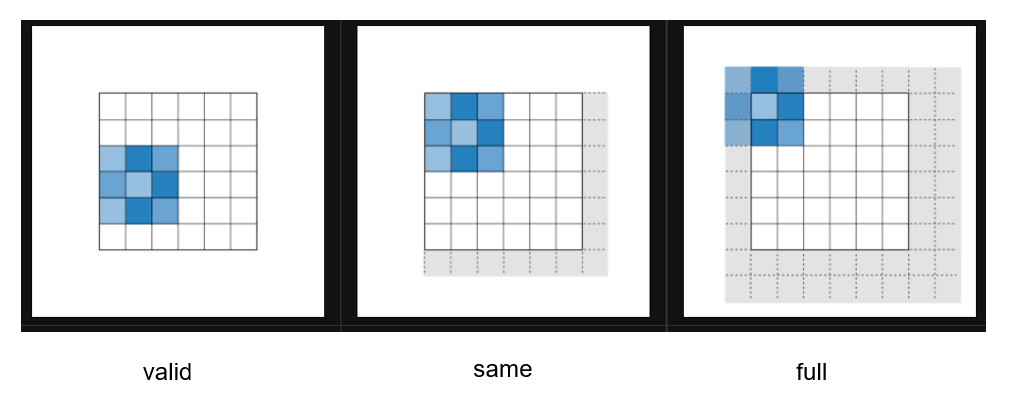
</div>

- valid: In this mode, there is no padding. The convolution for the part that does not match is dropped. 
- same: This is when padding is applied such that if strides=1, the feature map has the same size as input data, and if strides=2, the feature map is half the size of the input data. Hence, the "same padding" is also called "half padding". 
- full: This is maximum padding such that end convolutions are performed on the limits of the input.

Padding helps us to control the height and width of the output volume. The most common padding used is "same" padding to preserve the spartial size of the input volume by ensuring that the height and width of the input and output volumes are the same. 

### Dropout layer
Dropout involves dropping out certain portions of each image or setting the pixel values to zero for certain portions. Dropout helps us to build a model that generalizes well to unseen examples. 

No parameters are learned in the dropout layer. The dropout layer can be defined in keras by specifying the percentage of pixels that should be dropped or set to 0.

Below is an illustration of dropout:

<div style="max-width:700px;max-height:400px; auto; margin-center">
    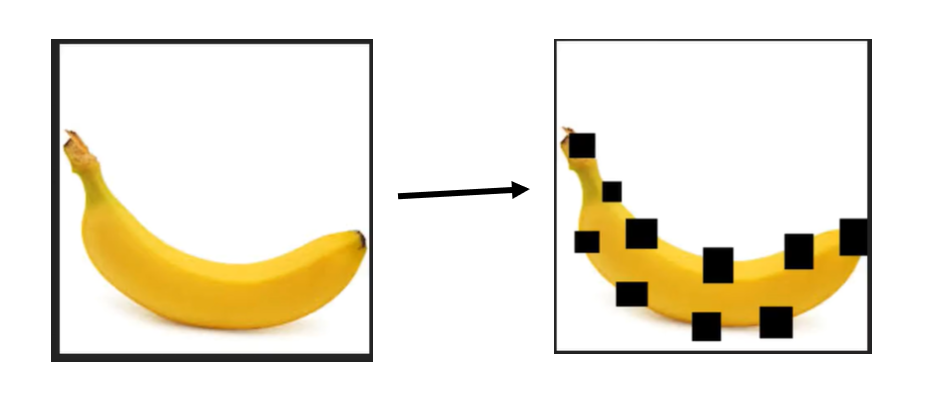
</div>

### Image augumentation
Image augumentation involves random transformations on each image. The image could be transformed through rotations, shifting, flipping, etc. The transformations are done for each epoch such that each epoch has a different variant of the original image. As such, it appears as though the dataset has been increased due to the different variants of the dataset used in each epoch.

Image augmentation is a preprocessing step used to generate more images based on existing images. This helps us to get more representative data that can generalize well to test samples, hence prevents overfitting. 
<div style="max-width:700px;max-height:400px; auto; margin-center">
    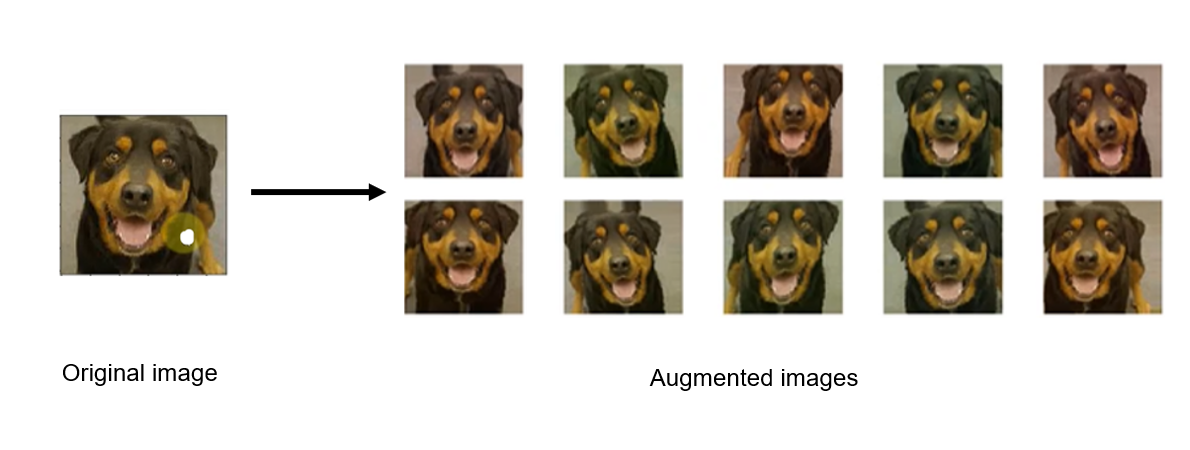
</div>

Image augmentation helps us to learn models that are more robust with better accuracy as the models are trained on different variations of the same image. Color shifting is also used for image augmentation. 

Color shifting can be achieved by using different RGB values to distort the color channels.  

Random cropping is also one technique used for image augmentation. 

## A Convolutional neural network example for image classification
In this example, we wil use the CIFAR10 image dataset in keras to illustrate how to construct a convolution neural networks model. Let's use a convolutional neural networks architecture consisting of:
- input layer
- convolutional layer + ReLU
- pooling layer 
- convolutional layer + ReLU
- pooling layer
- flatten layer 
- fully connected layer 
    - hidden layer + RELU 
    - hidden layer + RELU
    - output layer + SOFTMAX


### Preprocessing of image data

In [3]:
# load data
(x_train_ci, y_train_ci), (x_test_ci, y_test_ci) = cifar10.load_data()
# scale input data
# scale the training and test input data
x_train_ci = x_train_ci/255
x_test_ci = x_test_ci/255
# transform output data to categorical type 
y_train_ci = tf.keras.utils.to_categorical(y_train_ci)
y_test_ci = tf.keras.utils.to_categorical(y_test_ci)
print(x_train_ci.shape, y_train_ci.shape)
print(x_test_ci.shape, y_test_ci.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


### Model building

In [14]:
tf.random.set_seed(1234)
model = keras.Sequential()
# specify number of filters and filter size 
## as arguments for the first and second parameter respectively
model.add(layers.Conv2D(28, (3,3), activation='relu', padding="same", input_shape= (32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_ci, y_train_ci, epochs=8, batch_size=128)
model.summary()

Epoch 1/8
391/391 [==============================] - 64s 159ms/step - loss: 1.5725 - accuracy: 0.4415
Epoch 2/8
391/391 [==============================] - 58s 149ms/step - loss: 1.1464 - accuracy: 0.6010
Epoch 3/8
391/391 [==============================] - 68s 174ms/step - loss: 0.9631 - accuracy: 0.6639
Epoch 4/8
391/391 [==============================] - 63s 161ms/step - loss: 0.8272 - accuracy: 0.7123
Epoch 5/8
391/391 [==============================] - 67s 172ms/step - loss: 0.7119 - accuracy: 0.7519
Epoch 6/8
391/391 [==============================] - 70s 179ms/step - loss: 0.6011 - accuracy: 0.7900
Epoch 7/8
391/391 [==============================] - 62s 158ms/step - loss: 0.4994 - accuracy: 0.8284
Epoch 8/8
391/391 [==============================] - 75s 192ms/step - loss: 0.3992 - accuracy: 0.8649
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (

In [15]:
# evaluate the model
train_acc = model.evaluate(x_train_ci, y_train_ci)[1] 
test_acc = model.evaluate(x_test_ci, y_test_ci)[1]
print("Accuracy on Training Set: ", train_acc)
print("Accuracy on Test Set: ", test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.8920 - accuracy: 0.7215
Accuracy on Training Set:  0.9071999788284302
Accuracy on Test Set:  0.7214999794960022


**Dropout**

We could add a dropout layer after the flatten layer using the code:
- model.add(layers.Dropout(0.5))
- specifying 0.5 in the dropout layer means that we want to drop 5% of the pixels in each image. This will improve on overfitting. 

In [16]:
# build model with dropout layer
tf.random.set_seed(1234)
model = keras.Sequential()
# specify number of filters and filter size as first and second parameter respectively
model.add(layers.Conv2D(28, (3,3), activation='relu', padding="same", input_shape= (32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
# drop 5% of the pixels in each image
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_ci, y_train_ci, epochs=8, batch_size=128, verbose=0)

# model evaluation
train_acc = model.evaluate(x_train_ci, y_train_ci)[1] 
test_acc = model.evaluate(x_test_ci, y_test_ci)[1]
print("Accuracy on Training Set: ", train_acc)
print("Accuracy on Test Set: ", test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.8193 - accuracy: 0.7236
Accuracy on Training Set:  0.8267599940299988
Accuracy on Test Set:  0.7235999703407288


## Building a Model with Image Data in a Directory
If the training and test sets are in a directory on your computer system, we can upload the data and use it to train a CNN as shown in this section. You may create a training set folder and test set folder inside a dataset folder. For example, if the data set is binary, say consist of cars and flowers, we create a `car` folder and a `flower` folder containing the car and flower images respectively, for both training and test sets. We can then place the car and flower folders containing training images into the training set folder and put the car and flower folders containing the test images into the test set folder as shown below:


<div style="max-width:650px;max-height:400px; auto; margin-left">
    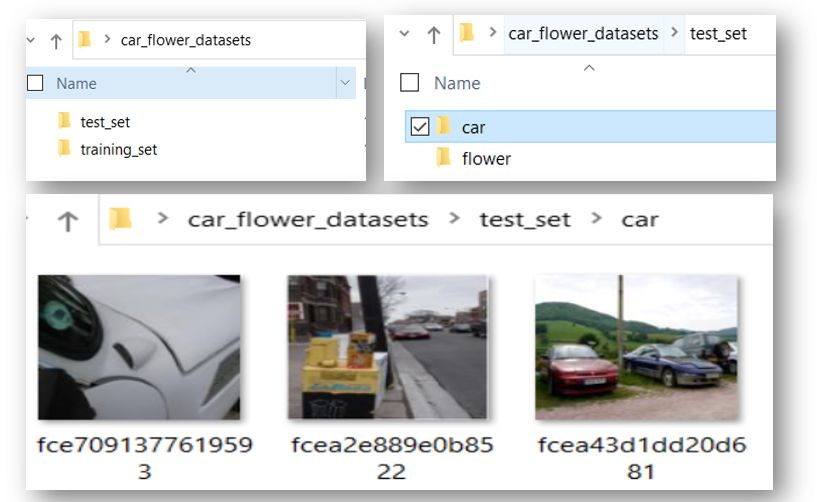
</div>

You can download this data from Kaggle:https://www.kaggle.com/olavomendes/cars-vs-flowers

In [219]:
base_dir = "C:\\Users\\nnfon\\Desktop\\car_flower_datasets"
train_dir = os.path.join(base_dir, "training_set")
test_dir = os.path.join(base_dir, "test_set")

# directory with training car images
train_car_dir = os.path.join(train_dir, "car")
# directory with test car images 
test_car_dir = os.path.join(test_dir, "car")

# directory with training flower images 
train_flower_dir = os.path.join(train_dir, "flower")
# directory with test flower images 
test_flower_dir = os.path.join(test_dir, "flower")

### Create a data generator 
We will create a data generator that will loop over the data in batches to generate batches of tensor image data. 


In [220]:
# create data generator that will loop over the data and scale it
## we will not apply augmentation to the data at this time
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# create training set images in batches of 20 from the training set directory
## by using the test_datagen generator
train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

# create test set images in batches of 20 from the test set directory
## by using the test_datagen generator
test_set = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')
print("Test image shape: ", test_set.image_shape) 
print("Train image shape: ", train_set.image_shape) 

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Test image shape:  (64, 64, 3)
Train image shape:  (64, 64, 3)


### Build the model

Note that to build the model, we will have to specify the epochs and steps per epoch
- One epoch is when the algorithm sees all the examples in the dataset, epochs specified is the number of times the algorithm should see the entire dataset. 
- Note that a batch size determines how many examples should be used at a time to update the parameters. So, if we update the parameters using batches of specific batch sizes, it will take a certain number of iterations (called steps per epoch) to see the entire dataset. So, steps per epoch is basically the size of the dataset divided by the batch size. 
- This concept of epoch and steps per epoch works like a nested for loop where the outer loop is over the number of epoch and within each epoch is the inner loop, over different batches. So, the number of batches (where each batch has a batch size) could be seen as the number of steps per epoch. 




In [221]:
# build model with dropout layer
tf.random.set_seed(1234)
model = keras.Sequential()
# specify number of filters and filter size as first and second parameter respectively
model.add(layers.Conv2D(28, (3,3), activation='relu', padding="same", input_shape= (64, 64, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
# drop 5% of the pixels in each image
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

# fit the model
model.fit(
        train_set,
        steps_per_epoch=100, # steps*batch_size=2000
        epochs=5,
        validation_data=test_set,
        validation_steps=100, 
        shuffle=False)

Epoch 1/5
100/100 [==============================] - 29s 276ms/step - loss: 0.5746 - accuracy: 0.7095 - val_loss: 0.4414 - val_accuracy: 0.7940
Epoch 2/5
100/100 [==============================] - 21s 211ms/step - loss: 0.4379 - accuracy: 0.7900 - val_loss: 0.4447 - val_accuracy: 0.7895
Epoch 3/5
100/100 [==============================] - 21s 213ms/step - loss: 0.3523 - accuracy: 0.8430 - val_loss: 0.4214 - val_accuracy: 0.7970
Epoch 4/5
100/100 [==============================] - 21s 208ms/step - loss: 0.3400 - accuracy: 0.8505 - val_loss: 0.4777 - val_accuracy: 0.7670
Epoch 5/5
100/100 [==============================] - 20s 197ms/step - loss: 0.2890 - accuracy: 0.8790 - val_loss: 0.3992 - val_accuracy: 0.8245


The training accuracy is 88.33% while the validation accuracy is 81.55. We can reduce overfitting by applying image augmentation. 

### Model building with augmentated Images 
We can use the car and flower dataset and create augmented images that will help reduce overfitting. 


In [222]:
# create a data generator where each training batch is augmented randomly 
# most of the values of the parameters range from 0 to 1. 
# The specified values indicate the maximum value in the range (0, max). 
# During each step, a different random values are selected and applied 
tf.random.set_seed(1234)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# create batches of training and test set
train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='binary')

# build model with dropout layer
tf.random.set_seed(1234)
model = keras.Sequential()

model.add(layers.Conv2D(28, (3,3), activation='relu', padding="same", input_shape= (64, 64, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
# drop 5% of the pixels in each image
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

# fit the model
model.fit(
        train_set,
        steps_per_epoch=100, # steps*batch_size=2000
        epochs=5,
        validation_data=test_set,
        validation_steps=100, 
        shuffle=False)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - 26s 259ms/step - loss: 0.6422 - accuracy: 0.6440 - val_loss: 0.5214 - val_accuracy: 0.7630
Epoch 2/5
100/100 [==============================] - 22s 222ms/step - loss: 0.5159 - accuracy: 0.7555 - val_loss: 0.5030 - val_accuracy: 0.7685
Epoch 3/5
100/100 [==============================] - 23s 228ms/step - loss: 0.4850 - accuracy: 0.7725 - val_loss: 0.5435 - val_accuracy: 0.7420
Epoch 4/5
100/100 [==============================] - 23s 227ms/step - loss: 0.4462 - accuracy: 0.7945 - val_loss: 0.4829 - val_accuracy: 0.7725
Epoch 5/5
100/100 [==============================] - 23s 226ms/step - loss: 0.4528 - accuracy: 0.7930 - val_loss: 0.4020 - val_accuracy: 0.8145


The gap between the training and test accuracy has reduced for the augmented images compared to the images with no augmentation. 

## Pre-trained Neural Networks

Instead of building a CNN from scratch, pre-trained networks can be used to predict new image samples. Deep neural networks that have been been pre-trained are useful for predicting samples having the same classes as the pre-trained set. 

Pre-trained models save computational time and resources. Pre-trained models are trained on huge amount of data.

Examples of pre-trained models in keras inlcude:
- Xception
- VGG16
- VGG19
- ResNet50
- ResNet101
and so on (see: https://keras.io/api/applications/ for more pre-trained models)

### Steps for using a pre-trained Model 

A pretrained model can be used without tuning as follows
1. load the data 
2. preprocess the data 
3. initialize the pre-trained model
4. make prediction with the model
5. find the object predicted with the highest probability

### Using a pre-trained model for Prediction

Let's use the ResNet50 pre-trained model to make a predictions. ResNet-50 is a convolutional neural network that is 50 layers deep and used more than a million image data with 1000 categories. The images include keyboard, mouse, pencil, and many animals, etc. 

The data used for the Restnet is of shape(224, 224, 3) so we need to make sure the image sample we want to predict has the same shape. 



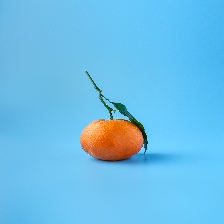

In [223]:
# lets upload an image from the current directory 
orange = tf.keras.preprocessing.image.load_img("orange.jpg",
                                              color_mode="rgb",
                                              target_size=(224, 224)) 
orange

### Preprocessing of image to be predicted

In [224]:
# convert image to arrays 
orange_arr = tf.keras.preprocessing.image.img_to_array(orange)
orange_arr.shape

(224, 224, 3)

The data used for the ResNet has 4 dimensions so we need to reshape the image to be predicted to 4D

In [225]:
# we could use
orange_arr.reshape(1, 224, 224, 3).shape

(1, 224, 224, 3)

In [226]:
# we could also use 
orange_array = np.expand_dims(orange_arr, axis=0)
orange_array.shape

(1, 224, 224, 3)

In [227]:
# preprocess the image to be predicted 
## use a preprocess_input() function from the restnet50 module
orange_image = tf.keras.applications.resnet50.preprocess_input(orange_array)

### Initialize the pre-trained model and use it for prediction

In [228]:
# initialize the pretrained model
resnet_model = tf.keras.applications.ResNet50()
# resnet_model.summary()

In [229]:
# make a prediction 
y_pred = resnet_model.predict(orange_image)

In [230]:
# print the top 5 probabilities with the corresponding predicted images
# use the decode_predictions() function inside the resnet50 module
tf.keras.applications.resnet50.decode_predictions(y_pred, top=5)

[[('n07747607', 'orange', 0.980268),
  ('n07749582', 'lemon', 0.008288043),
  ('n07745940', 'strawberry', 0.0043286383),
  ('n12620546', 'hip', 0.0032043792),
  ('n07753592', 'banana', 0.0016263492)]]

We can see that orange is predicted with the highest probability

### Predicting a Car with Pre-trained VGG16

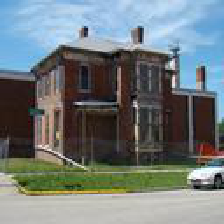

In [231]:
# load the data 
new_image= tf.keras.preprocessing.image.load_img("car.jpg",
                                              color_mode="rgb",
                                              target_size=(224, 224)) 
new_image

In [232]:
# preprocessing 
new_image_arr= tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_arr, axis=0)
new_image_processed = tf.keras.applications.vgg16.preprocess_input(new_image_array)

In [233]:
# initalize model, make prediction, and label the image
vgg16_model = tf.keras.applications.VGG16()
y_pred = vgg16_model.predict(new_image_processed)
label = tf.keras.applications.vgg16.decode_predictions(y_pred)
label

[[('n03776460', 'mobile_home', 0.46604404),
  ('n03032252', 'cinema', 0.10472035),
  ('n04562935', 'water_tower', 0.02974546),
  ('n04467665', 'trailer_truck', 0.022793481),
  ('n03345487', 'fire_engine', 0.018620154)]]

Since the image has both a house and a vehicle, the pre-trained model is finding it difficult to distinguish between a house and a vehicle so the image is classified as a mobile home. So, let's fine-tune the pre-trained model. 

## Transfer Learning 
We can use pre-trained model for transfered learning. 
It is important to note that a CNN architechture is made up of the convolutional base and the classifier (ANN). We may keep the convolutional base of the pre-trained model and add the classifier that is constructed to suit a specific dataset that may be different in categories from the dataset that was used for the pre-trained model.That is, we can freeze the initial layers of the pre-trained model that contain generic information while the classifier is specified depending on the specific data with categories of interest to be predicted.  
For example, if the pre-trained model contains different types of animals, we can add a classifier that predict not all animals but only cats and dogs if we are only interested in predicting cats and dogs in our new unlabelled samples.
Hence a pre-trained model needs to be fine-tuned by freezing the convolutional base and adding a classifier to the frozen convolutional base. This process is known as transfer learning. 

### How to finetune a pretrained model. 
We will fine-tune a pre-trained vgg16 model to classify an object as either a car or a flower. Normally, the vgg16 has 1000 categories, so we will tune it to predict only two categories.   
- initializing a pre-trained model
- initializing the sequential model
- add all the layers of the pretrained model to the sequential model except the last layer of the pretrained model
- free these initial layers of the pretrained model added to the sequential model
- add an output layer to the frozen layers 
- compile the network
- fit the model with some additional data (could be augmented)
- use the model to make a prediction on a new example. 

In [234]:
# create data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# create batches of training and test set
# change input size that of training data
train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [235]:
# initialize the pre-trained vgg16 model 
tf.random.set_seed(1234)
vgg16_model = tf.keras.applications.VGG16()
# vgg16_model.summary() 

The last layers of the vgg16 model are as follows:
<div style="max-width:600px;max-height:400px; auto; margin-center">
    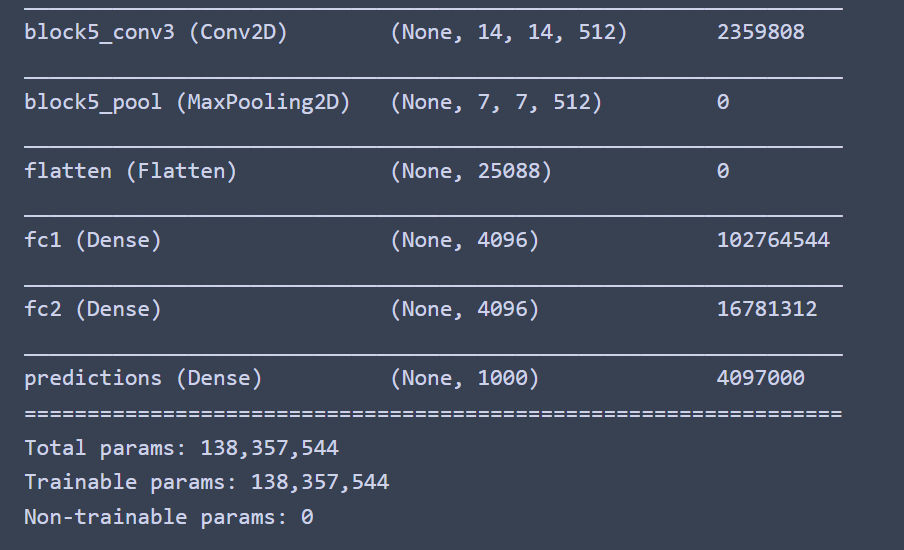
</div>


We want to transfer all the initial layers of the pre-trained model except the output layers to a classifier whose output layer will have a sigmoid activation.

In [236]:
# initialize the classifier model
model = tf.keras.Sequential()
# loop through the pre-trained layers and add them to the sequential model
# do not add the pre-trained output layer 
pre_trained_output = str(vgg16_model.layers[-1])
for layer in vgg16_model.layers:
    if str(layer) != pre_trained_output:
        model.add(layer)
# model.summary()

<div style="max-width:500px;max-height:400px; auto; margin-center">
    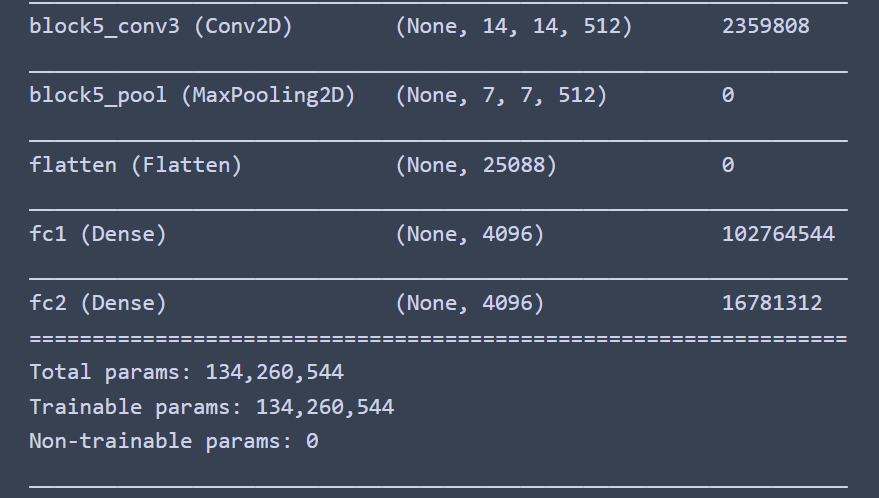
</div>

You would notice from the summary of the classifier model that the output layer has been deleted or was not added. 

In [237]:
# freeze the layers transfered to the new sequential model
for layer in model.layers:
    layer.Trainable=False

In [238]:
# # add the output layer with a sigmoid activation 
model.add(layers.Dense(1, activation="sigmoid"))
# model.summary()

<div style="max-width:500px;max-height:400px; auto; margin-center">
    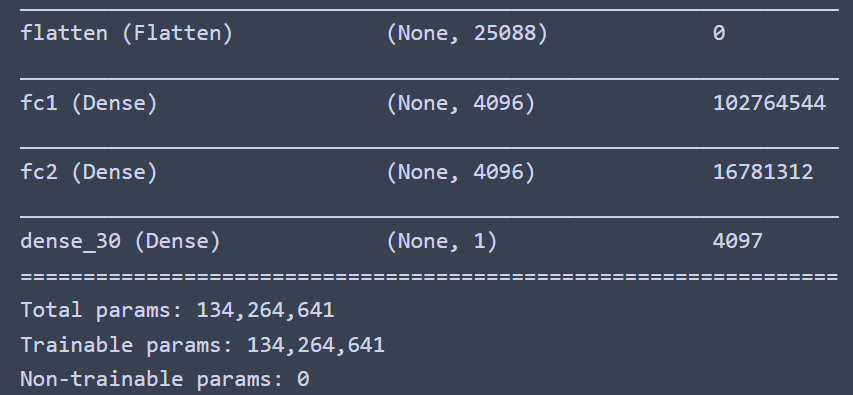
</div>

You would notice that the output or prediction layer has been added.

In [239]:
# compile and fit the model
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

# fit the model with the car-flower image data
model.fit(
        train_set,
        steps_per_epoch=100, # steps*batch_size=2000
        epochs=1,
        validation_data=test_set,
        validation_steps=100, 
        shuffle=False)

100/100 [==============================] - 3772s 37s/step - loss: 4805364.0000 - accuracy: 0.5210 - val_loss: 3.6225 - val_accuracy: 0.5000


I used only one epoch because of limited computational powers, you can set epochs to higher values to get a better accuracy. 

### Predict the new image 

In [240]:
## inspect the classes in the dataset
train_set.class_indices

{'car': 0, 'flower': 1}

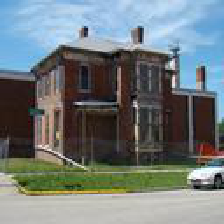

In [241]:
# load new image
new_image= tf.keras.preprocessing.image.load_img("car.jpg",
                                              color_mode="rgb",
                                              target_size=(224, 224)) 
new_image_arr= tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_arr, axis=0)
new_image

In [242]:
# make a prediction
prediction = model.predict(new_image_array)[0][0]
if prediction==1:
    print('It is a flower')
if prediction==0:
    print("It is a car")


It is a car


After fine-tuning the model, it was able to predict a car compared to predicting a mobile house when not fine-tuned. So, if the images you want to predict are not well represented in the pre-trained model, you may get bad predictions. Pre-train models allow us to use even smaller datasets to build a fine-tuned pre-trained model that gives better results. 

## Recurrent Neural Network (RNN)

Recurrent neural networks is a special type of neural networks used to model sequential data such as time seiries data or natural language data. The prediction of an output is based on the previously predicted output(s). Hence the model is based on the concept of sequential memory. The model takes into consideration contextual past information. 
In a traditional feedforward neural network, the predictions at time t are not influence by the prections at time t-1, t-2 etc, but not so with RNN. 

In RNN the predicted output at time t is included as input for predictions at time t+1, and so on. There are different types of RNN depending on the number of x-inputs and y-outputs as shown on the diagram below:

<div style="max-width:600px;max-height:400px; auto; margin-center">
    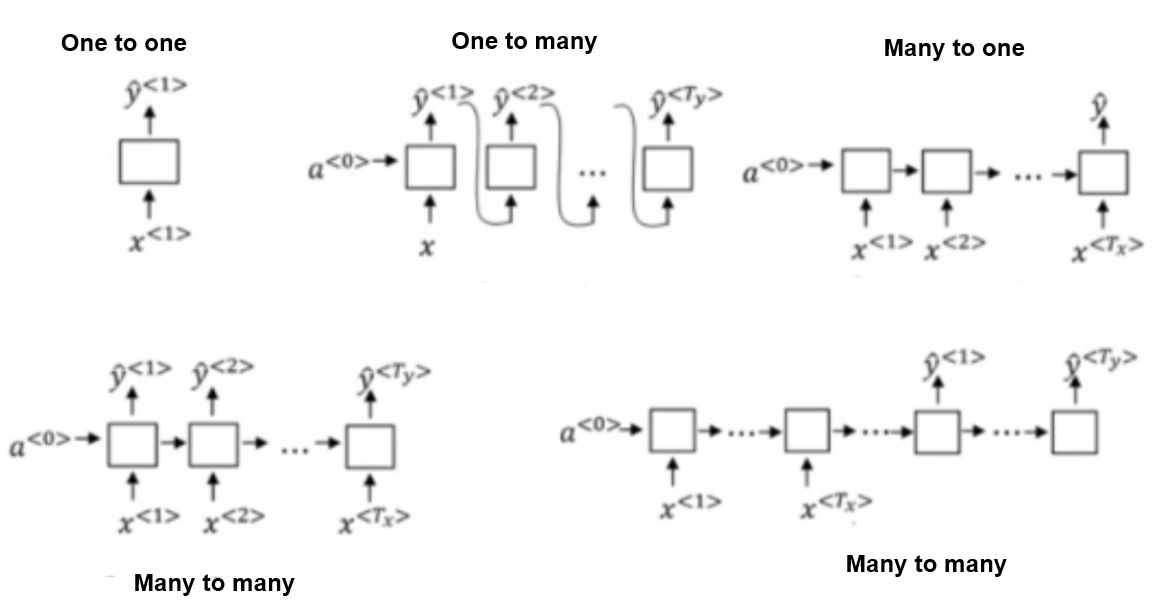
</div>
Applications of RNN Architechture 

- Many to one (many inputs to one output): used in sentimental analysis where there are several input text data values but a single output. 
- One to many (one input to many outputs): used in music generation
- Many to many: This could be used in machine translation where you input different sentences (which are encoded), and they are translated (decoded). 

Note that in a traditional deep neural network (as well as in traditional RNN), the gradient of initial weights can be very small due to the fact that the graident is obtained by multiplying several derivatives which are usually small values between 0 and 1. This problem is called the vanishing gradient problem. 

With smaller gradients, the algorithm becomes slower and slower to train. If the derivatives multiplied to get the gradient with respect to the weight are larger than 1, this can also lead to an exploding gradient problem.

The vanishing gradient problem makes it difficult to learn from long term historic information. The vanishing gradient problem in a traditional RNN can be solved using Long Short-Term Memory units (LSTM). 

### Using a LSTM to predict Amazon stock prices

Here are the steps we will follow to build the LSTM model for predicting Amazon stock prices. 

- 1. Extract Amazon stock prices from the internet
- 2. Create sequential sets of inputs where each set represents a timestep
- 3. Prepare the test dataset 
- 4. Build the LSTM model and fit the data 
- 5. Evaluate your model
- 6. Use the model to make predictions
- 7. Visualize the predicted values of test set and the actual values of the test set

### Extract Amazon stock prices from the Internet 
- The pandas-datareader python package can be used to extract stock prices through the internet. 
- Install the package using pip install pandas-datareader: https://pandas-datareader.readthedocs.io/en/latest/

In [135]:
# load amazon stock from 2000 to 2019 as training data
amazon_stock_train = web.DataReader('AMZN', 'yahoo', start='2000-01-02', end='2019-01-01')
amazon_stock_train

High          Low         Open        Close    Volume  \
Date                                                                       
2000-01-03    89.562500    79.046875    81.500000    89.375000  16117600   
2000-01-04    91.500000    81.750000    85.375000    81.937500  17487400   
2000-01-05    75.125000    68.000000    70.500000    69.750000  38457400   
2000-01-06    72.687500    64.000000    71.312500    65.562500  18752000   
2000-01-07    70.500000    66.187500    67.000000    69.562500  10505400   
...                 ...          ...          ...          ...       ...   
2018-12-24  1396.030029  1307.000000  1346.000000  1343.959961   7220000   
2018-12-26  1473.160034  1363.010010  1368.890015  1470.900024  10411800   
2018-12-27  1469.000000  1390.310059  1454.199951  1461.640015   9722000   
2018-12-28  1513.469971  1449.000000  1473.349976  1478.020020   8829000   
2018-12-31  1520.760010  1487.000000  1510.800049  1501.969971   6954500   

              Adj Close  
Date                     
2000-01-03    89.375000  
2000-01-04    81.937500  
2000-01-05    69.750000  
2000-01-06    65.562500  
2000-01-07    69.562500  
...                 ...  
2018-12-24  1343.959961  
2018-12-26  1470.900024  
2018-12-27  1461.640015  
2018-12-28  1478.020020  
2018-12-31  1501.969971  

[4779 rows x 6 columns]

In [136]:
# extract the stock values into a numpy nx1 array
training_data = amazon_stock_train[["Open"]].values
# view the first 10 data points in the training set
training_data[0:10]

array([[81.5   ],
       [85.375 ],
       [70.5   ],
       [71.3125],
       [67.    ],
       [72.5625],
       [66.875 ],
       [67.875 ],
       [64.9375],
       [66.75  ]])

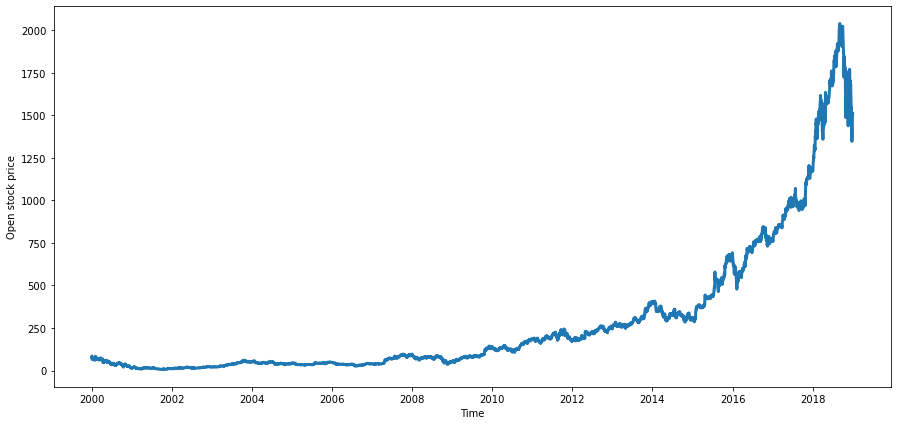

In [137]:
plt.figure(figsize=(15, 7))
plt.xlabel("Time")
plt.ylabel("Open stock price")
plt.plot(amazon_stock_train["Open"], lw=3);

In [143]:
# scale the training data
training_data_sc = MinMaxScaler().fit_transform(training_data)
training_data_sc

array([[0.03719614],
       [0.03910294],
       [0.03178329],
       ...,
       [0.71267098],
       [0.72209428],
       [0.74052262]])

### Create sequential batches of prices or timesteps
We can create batches of input data where each input or timestep has 60 data points or approximately 2 months of data.
- If the time series data is [1, 2, 3, 4, 5, 6, 7, 8] and if we create sequential inputs of 4;
    - We can have the first set of inputs being [1, 2, 3, 4] and the first output y value being [5]. 
    - Then the second sequential set of inputs will be [2, 3, 4, 5] while the corresponding output will be [6]. 
    - This process continues until there are timesteps or input sets =  len(data) - len(input)

In [117]:
# create timesteps (sets of inputs) for the training data
## and corresponding outputs
X_train = []
y_train = []
for i in range(60, len(training_data_sc)):
    X_train.append(training_data_sc[i-60:i, 0])
    y_train.append(training_data_sc[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

X_train.shape:  (4719, 60)
y_train.shape:  (4719,)


Let's reshape the dimensions of the X_train so that each input set is matrix with dimensions 60x1. So, we will add a dimension of 1 to the end. 

In [246]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train.shape

(4719, 60, 1)

### Build the LSTM model

In [248]:
tf.random.set_seed(1234)
LSTM_model = keras.Sequential()
# set return sequence to true if another LSTM will be specified
LSTM_model.add(layers.LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
# add another LSTM layer 
LSTM_model.add(layers.LSTM(units=50,  return_sequences=True))
# add one more LSTM layer
LSTM_model.add(layers.LSTM(units=50)) 
# add the output layer 
LSTM_model.add(layers.Dense(1))

# compile the model 
LSTM_model.compile(optimizer="adam", loss="mean_squared_error")
# fit the model
LSTM_model.fit(X_train, y_train.reshape(-1, 1), epochs=5, batch_size=20)

Epoch 1/5
236/236 [==============================] - 21s 66ms/step - loss: 0.0015
Epoch 2/5
236/236 [==============================] - 15s 64ms/step - loss: 2.5701e-04
Epoch 3/5
236/236 [==============================] - 15s 64ms/step - loss: 2.3714e-04 1s 
Epoch 4/5
236/236 [==============================] - 15s 64ms/step - loss: 1.9695e-04
Epoch 5/5
236/236 [==============================] - 15s 65ms/step - loss: 1.9736e-04


In [250]:
LSTM_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
lstm_28 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
lstm_29 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Prepare the test dataset and make predictions 
- Since we are dealing with time series data, the test set needs to be a continuation of the training set. That is, the test set has to be future data. 
- Our sets of inputs have a size of 60, which means we are using 60 past stock prices to predict the next stock prices. As such, we need to add the last 60 stock prices of the training set on top of the test set so we can use those to predict the first stock value in the test set and go from there. 
- We will still need to create timesteps for the test data where each timestep has 60 stock prices. 

In [261]:
# last 60 stock prices in the training set 
train_last_60 = amazon_stock_train[len(amazon_stock_train)-60:]["Open"]
# load amazon stock test dataset
amazon_stock_test = web.DataReader('AMZN', 'yahoo', start='2019-01-02', end='2021-01-01')
# join last 60 stock prices in training set to stock test dataset
test_data = pd.concat([train_last_60, amazon_stock_test["Open"]], axis="rows")
test_data = test_data.values
test_data = test_data.reshape(-1, 1)
## scale test data
sc = MinMaxScaler()
test_data_sc = sc.fit_transform(test_data)

# create timesteps with test data
X_test = []
for i in range(60, len(test_data_sc)):
    X_test.append(test_data_sc[i-60:i, 0])
X_test = np.array(X_test)

## make X_test to be 3D
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# make predictions 
predicted_stock_prices_sc = LSTM_model.predict(X_test)
# unscale the predicted stock prices 
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices_sc)
predicted_stock_prices[0:5]

array([[1543.0183],
       [1529.0825],
       [1518.4009],
       [1511.1503],
       [1508.1509]], dtype=float32)

### Visualize predictions vs actual stock prices

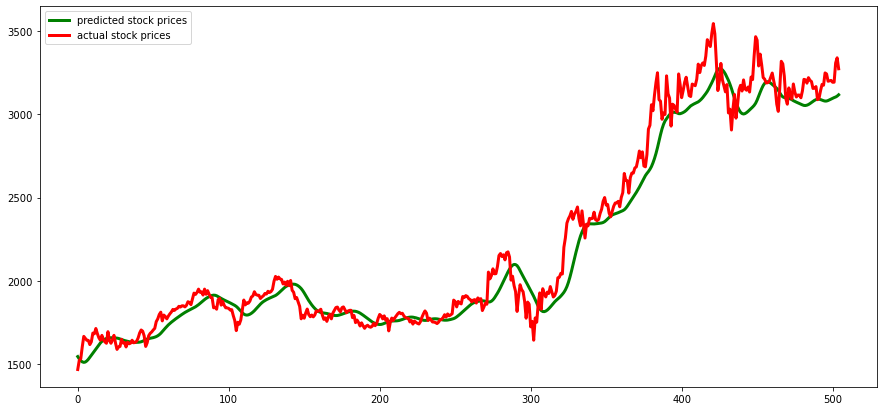

In [271]:
# visualize the predictions vs the actual stock prices 
plt.figure(figsize=(15, 7))
plt.plot(predicted_stock_prices, lw=3, color="green", label="predicted stock prices")
plt.plot(amazon_stock_test["Open"].values, lw=3, color="red", label="actual stock prices")
plt.legend();

The predicted stock prices are very close to the actual stock prices. LSTM models are great at predicting stock prices. 